# **2 - Análisis exploratorio de datos**
## **Importando modulos**

Primero importo todos los modulos que usaré para el desarrollo de mi proyecto. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

## **Importando datos**
Voy a importar los datos que con los que estaré trabajando.

In [2]:
#Guardamos los nombres de las carpetas en estas variables
train_folder = r'C:\Users\bertr\Desktop\UDD\Proyecto final\datos\train'
test_folder = r'C:\Users\bertr\Desktop\UDD\Proyecto final\datos\test'
val_folder = r'C:\Users\bertr\Desktop\UDD\Proyecto final\datos\val'

Se eliminan las imágenes duplicadas. Esto se hace con la función de abajo, en la que hay que pasar la ruta de la carpeta. Se crean dos listas vacías. En la primera se guardan los datos de las imágenes, y en la segunda, las duplicados. El for loop de abajo itera a través de todas las imágenes (usando el tipo de archivo de las imágenes, png, jpg, jpeg, etc), y las va guardando en la primera lista. En el caso de que una imágen vuelva a aparecer, se guarda en la segunda lista que se creo. Luego se crea otro función, que borra estas imágenes repetidas. Por último, se usan condicionales para eliminar estas duplicadas. Si no hay nada en esta lista, se dice que no hay nada. En el caso de que si haya imágenes repetidas, se eliminan. 

In [5]:
import os
from PIL import Image
import imagehash

def find_duplicate_images(folder_path):
    image_hashes = {}
    duplicates = []

    for filename in os.listdir(folder_path):
        if filename.endswith((".png", ".jpg", ".jpeg", ".bmp", ".gif")):
            file_path = os.path.join(folder_path, filename)
            try:
                image = Image.open(file_path)
                image_hash = imagehash.average_hash(image)

                if image_hash in image_hashes:
                    duplicates.append(file_path)
                else:
                    image_hashes[image_hash] = file_path
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")

    return duplicates

def delete_duplicates(duplicates):
    for file_path in duplicates:
        os.remove(file_path)
        print(f"Deleted duplicate image: {file_path}")

duplicates = find_duplicate_images(train_folder)

if duplicates:
    delete_duplicates(duplicates)
else:
    print("No hay duplicados.")

No duplicates found.


In [8]:
duplicates = find_duplicate_images(test_folder)
if duplicates:
    delete_duplicates(duplicates)
else:
    print("No hay duplicados.")

No duplicates found.


In [9]:
duplicates = find_duplicate_images(val_folder)

if duplicates:
    delete_duplicates(duplicates)
else:
    print("No hay duplicados.")

No duplicates found.


Ninguna de las tres carpetas tienen imágenes duplicadas, por lo tanto, sigo con el EDA.

Me interesa saber como están dividos estos datos, por si se deben de imputar, eliminar o modificar algunos de alguna manera para poder tener unos datos balanceados y que el modelo no esté sesgado. Uso la librería OS para realizar estas cuentas. 

La función `os.listdir` de la biblioteca os lista todos los archivos y directorios en la carpeta especificada por (nombre carpeta) + "/PNEUMONIA". Luego, con el `len(...)` se está contando cuantos archivos están pasando aquí. 

Por último, uso la función `print` para imprimir lo que acabo de encontrar.

In [4]:
#Contamos cuantos datos tenemos en cada carpeta
train_pneumonia_count = len(os.listdir(train_folder + "/PNEUMONIA"))
train_normal_count = len(os.listdir(train_folder + "/NORMAL"))

test_pneumonia_count = len(os.listdir(test_folder + "/PNEUMONIA"))
test_normal_count = len(os.listdir(test_folder + "/NORMAL"))

val_pneumonia_count = len(os.listdir(val_folder + "/PNEUMONIA"))
val_normal_count = len(os.listdir(val_folder + "/NORMAL"))

#Imprimimos estos resultados
print(f'Número de imágenes de pulmones sanos en datos de entrenamiento: {train_normal_count}')
print(f'Número de imágenes de pulmones con neumonía en datos de entrenamiento: {train_pneumonia_count}')
print(f'Número de imágenes de pulmones sanos en datos de prueba: {test_normal_count}')
print(f'Número de imágenes de pulmones con neumonía en datos de prueba: {test_pneumonia_count}')
print(f'Número de imágenes de pulmones sanos en datos de validación: {val_normal_count}')
print(f'Número de imágenes de pulmones con neumonía en datos de validación: {val_pneumonia_count}')




Número de imágenes de pulmones sanos en datos de entrenamiento: 1341
Número de imágenes de pulmones con neumonía en datos de entrenamiento: 3875
Número de imágenes de pulmones sanos en datos de prueba: 234
Número de imágenes de pulmones con neumonía en datos de prueba: 390
Número de imágenes de pulmones sanos en datos de validación: 8
Número de imágenes de pulmones con neumonía en datos de validación: 8


Visualizamos esto con un diágrama de pie, que nos mostrará la proporción visualmente y usando porcentajes. 

Con `train_data`, `test_data` y `val_data`, creo un array en el que guardo los valores que obtuve para imágenes de pulmones sanos o con neumonía. Creo las etiquetas para distinguir entre las imágenes normales y con neumonía. 

Por otro lado, creo la variable `total_data`, en la cual sumo todos los valores de `train_data`, `test_data` y `val_data` para ver como los datos están divididos en los conjuntos de entrenamiento, prueba y validación. Además, se crean las etiquetas correspondientes. 

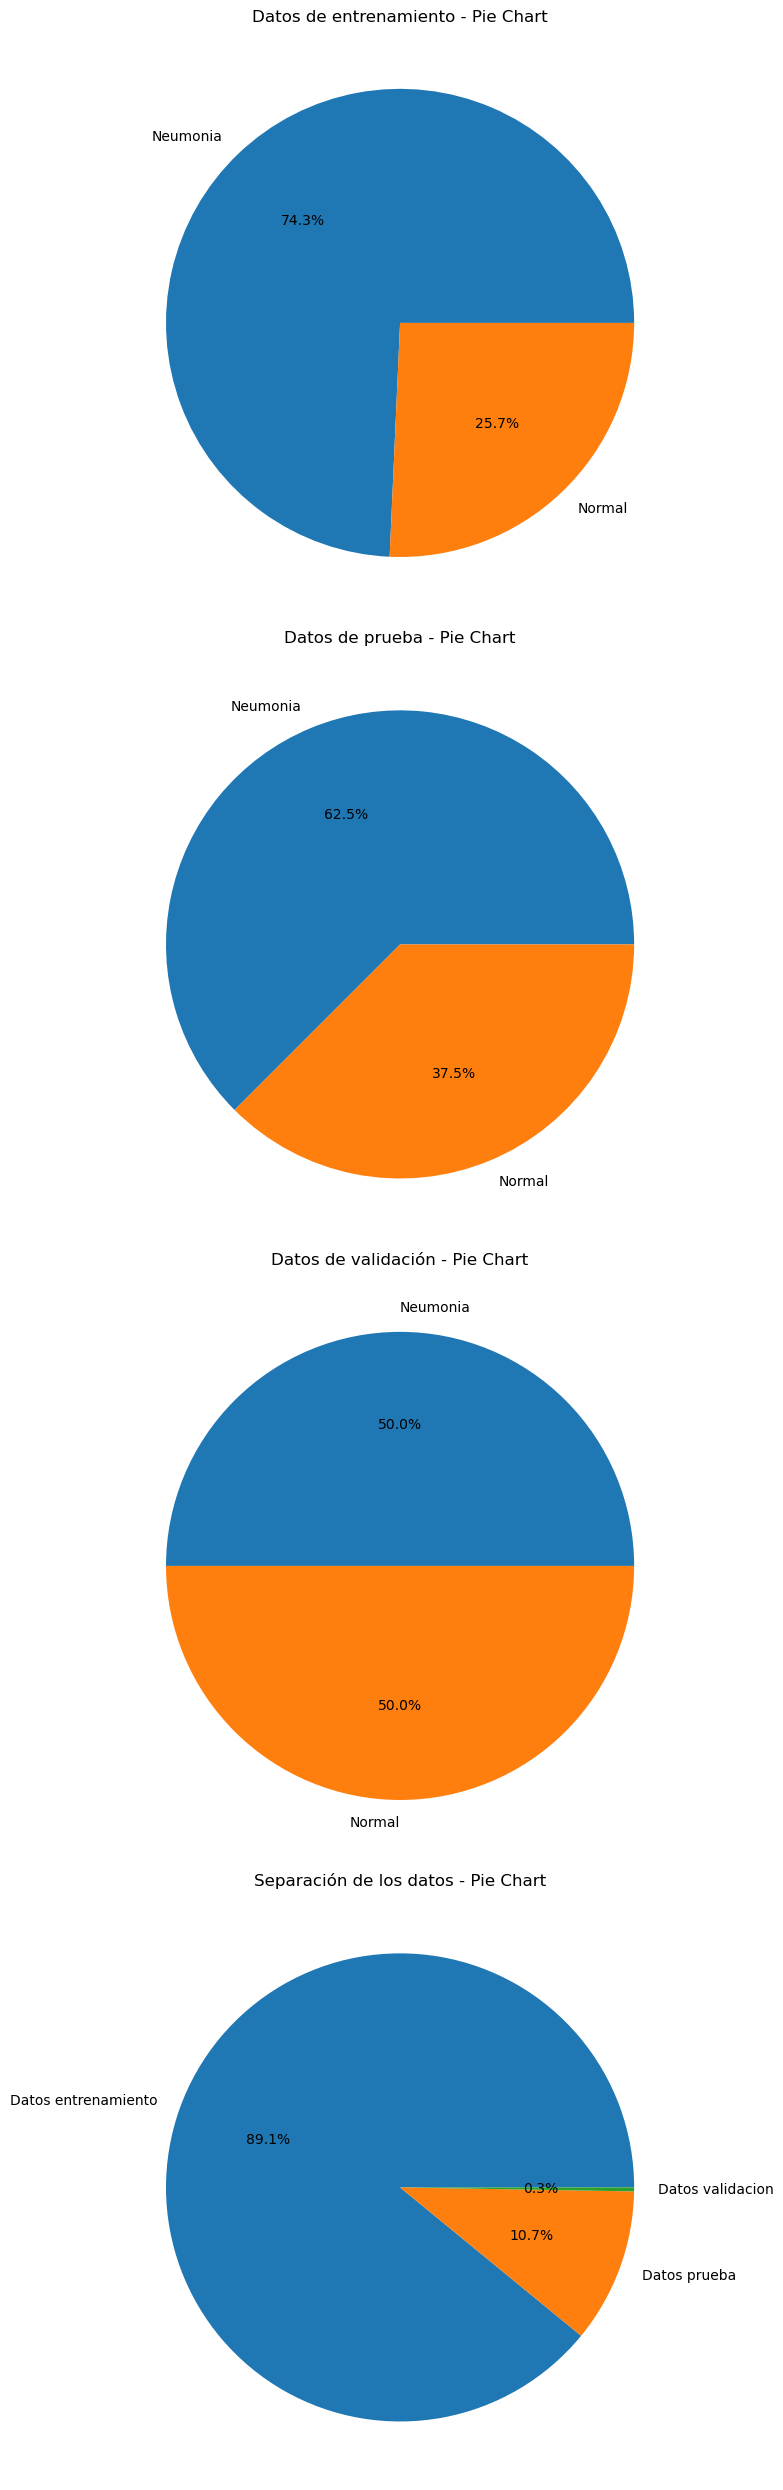

In [22]:
# Data
train_data = [train_pneumonia_count, train_normal_count]
test_data = [test_pneumonia_count, test_normal_count]
val_data = [val_pneumonia_count, val_normal_count]

# Labels
labels = ['Neumonia', 'Normal']

# Total counts for each dataset
total_train = sum(train_data)
total_test = sum(test_data)
total_val = sum(val_data)
total_data = [total_train, total_test, total_val]

# Labels for the total data pie chart
total_labels = ['Datos entrenamiento', 'Datos prueba', 'Datos validacion']

# Create the plots
fig, axes = plt.subplots(4, 1, figsize=(10, 25))  

# Training data pie chart
axes[0].pie(train_data, labels=labels, autopct='%1.1f%%')
axes[0].set_title('Datos de entrenamiento - Pie Chart')

# Testing data pie chart
axes[1].pie(test_data, labels=labels, autopct='%1.1f%%')
axes[1].set_title('Datos de prueba - Pie Chart')

# Validation data pie chart
axes[2].pie(val_data, labels=labels, autopct='%1.1f%%')
axes[2].set_title('Datos de validación - Pie Chart')

# Total data pie chart
axes[3].pie(total_data, labels=total_labels, autopct='%1.1f%%')
axes[3].set_title('Separación de los datos - Pie Chart')

# Show the plots
plt.tight_layout()
plt.show()

Por un lado, tenemos las proporciones de los datos de entrenamiento, prueba y validación. Aunque los casos de neumonía y normales no están balanceados en mitad, hay que tener en cuenta que la gran mayoría de los pacientes que reciben una radiografía seguramente no sufren de neumonía, debido a que este es un proceso normal en la etapa de ingreso a una clínica. Teniendo esto en cuenta, no creo que es muy grave que los datos no estén dividos de manera equitativa en el entrenamiento y en la prueba. En la validación, debido a que simplemente queremos corroborar lo obtenido anteriormente, me parece que es correcto que esté dividio en mitad y mitad.

Por otro lado, el último diagrama de pie nos muestra que alrededor del 90% de las imágenes están en el training set, un 10% en el testing set, y menos de un 0,5% en el validation set. Nuevamente, no creo que haya problemas con estas distribuciones, debido a la naturaleza del problema. 

## Imágenes 
A continuación, me gustaría ver algunas imágenes de estas radiografías. Esto lo hago únicamente por curiosidad, debido a que no tengo ninguna experiencia médica, y no sabría distinguir entre un pulmón sano o con neumonía. Sin embargo, como científico de datos, siento que es mi deber averiguar sobre el área con la que estoy trabajando, así que voy a ver si encuentro algunos patrones que pueda identificar en estas imágenes que me podrían ayudar a distinguir si es un pulmón sano o no. 

In [24]:
# Importamos esta librería que nos permite ver las imágenes
import matplotlib.image as mpimg

# Guardamos las imágenes
img_train_normal = mpimg.imread(os.path.join(train_folder, 'NORMAL', 'IM-0115-0001.jpeg'))
img_train_pneumonia = mpimg.imread(os.path.join(train_folder, 'PNEUMONIA', 'person1_bacteria_1.jpeg'))
img_val_normal = mpimg.imread(os.path.join(val_folder, 'NORMAL', 'NORMAL2-IM-1427-0001.jpeg'))
img_val_pneumonia = mpimg.imread(os.path.join(val_folder, 'PNEUMONIA', 'person1946_bacteria_4874.jpeg'))
img_test_normal = mpimg.imread(os.path.join(test_folder, 'NORMAL', 'IM-0001-0001.jpeg'))
img_test_pneumonia = mpimg.imread(os.path.join(test_folder, 'PNEUMONIA', 'person1_virus_6.jpeg'))

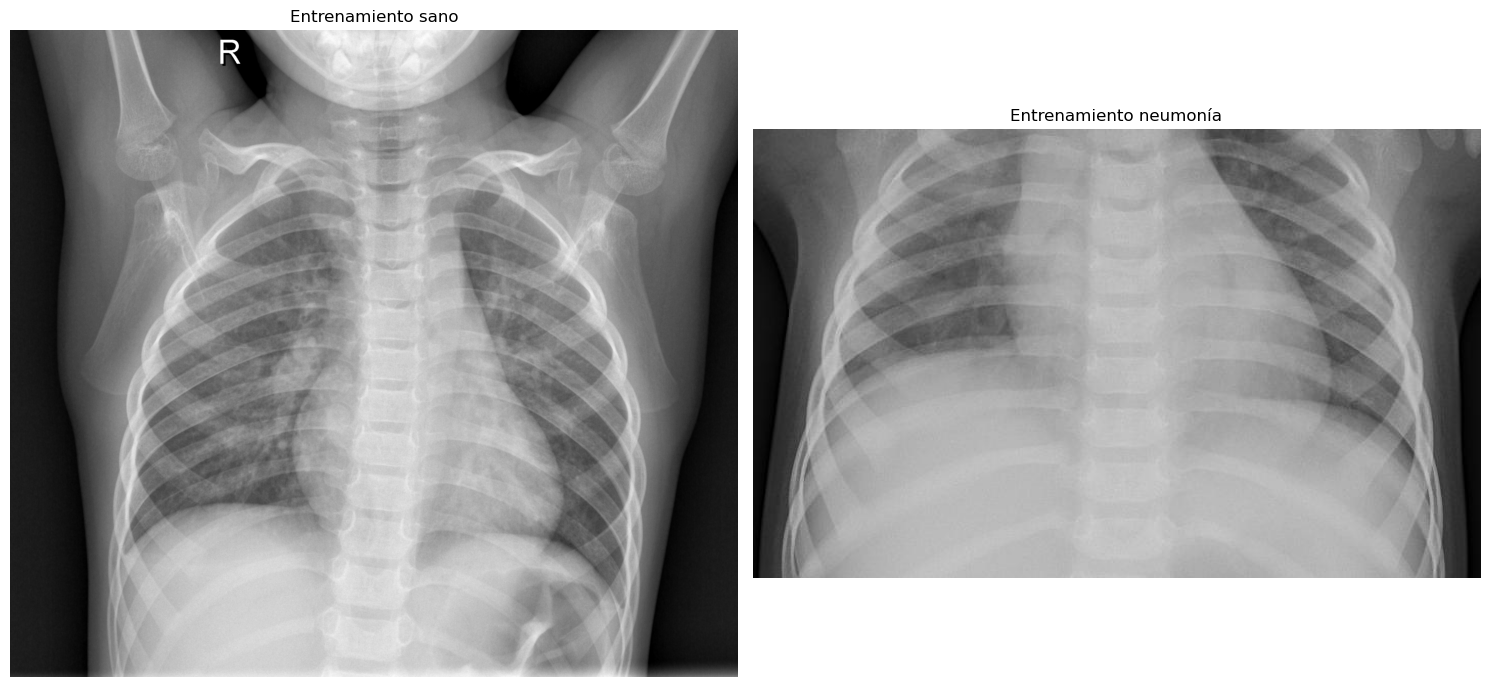

In [25]:
# Creamos los gráficos
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Mostramos los gráficos. El cmap lo cambia a grey para que las imágenes se vean en blanco y negro
axes[0].imshow(img_train_normal, cmap='gray')
axes[0].set_title('Entrenamiento sano')
axes[0].axis('off')

axes[1].imshow(img_train_pneumonia, cmap='gray')
axes[1].set_title('Entrenamiento neumonía')
axes[1].axis('off')

plt.tight_layout()
plt.show()


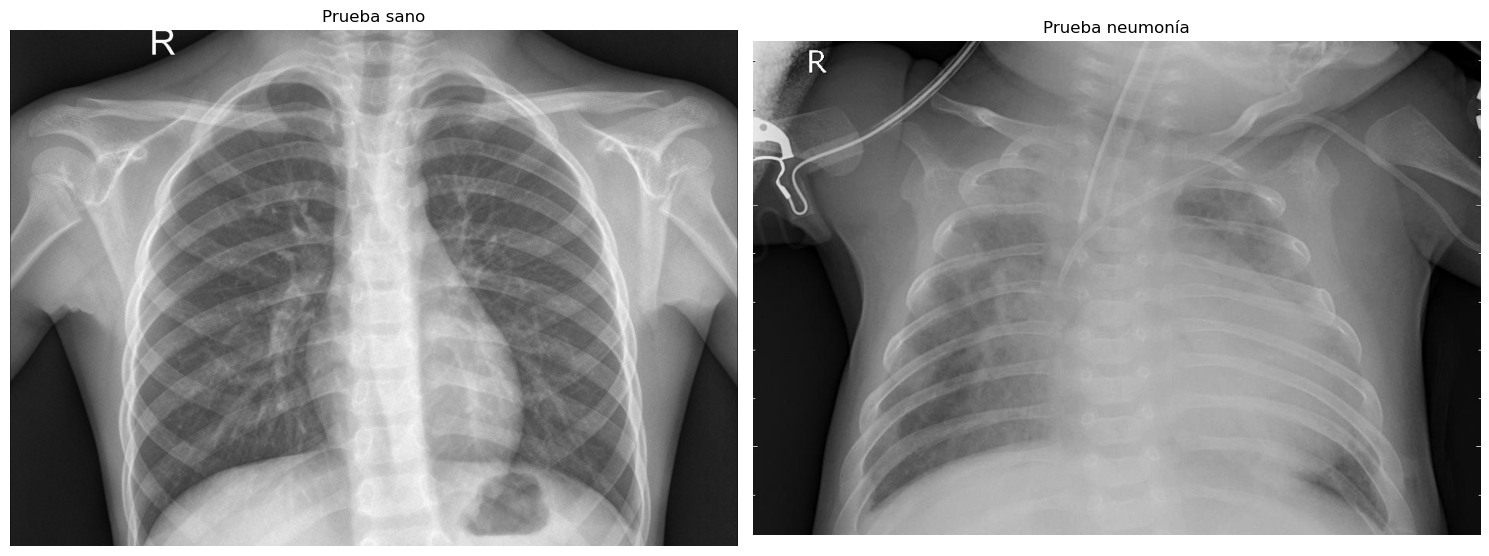

In [26]:
# Creamos los gráficos
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

axes[0].imshow(img_test_normal, cmap='gray')
axes[0].set_title('Prueba sano')
axes[0].axis('off')

axes[1].imshow(img_test_pneumonia, cmap='gray')
axes[1].set_title('Prueba neumonía')
axes[1].axis('off')

plt.tight_layout()
plt.show()

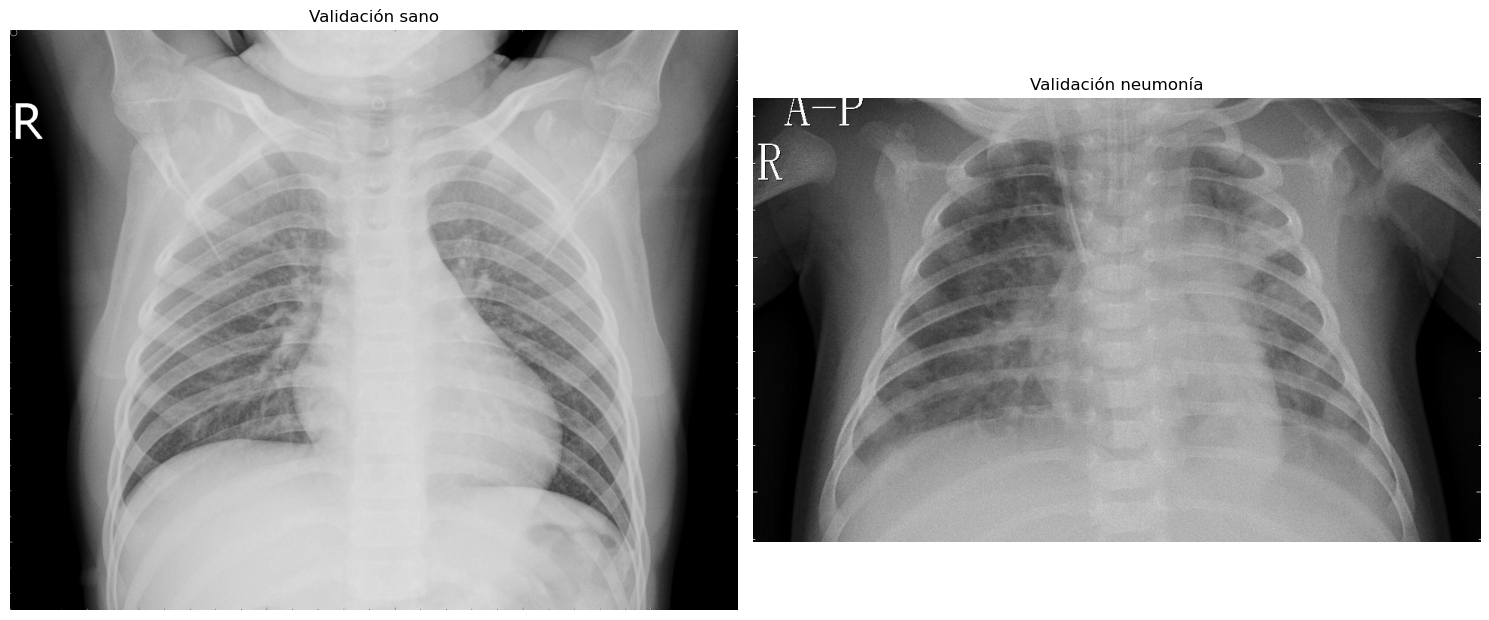

In [27]:
# Creamos los gráficos
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

axes[0].imshow(img_val_normal, cmap='gray')
axes[0].set_title('Validación sano')
axes[0].axis('off')

axes[1].imshow(img_val_pneumonia, cmap='gray')
axes[1].set_title('Validación neumonía')
axes[1].axis('off')

plt.tight_layout()
plt.show()

Al usar estas fotografías, y con busqueda adicional, me he logrado dar cuenta que las radiografías de un pulmón con neumonía por lo general tienen manchas blancas llamados infiltrados pulmonares. Estos son los principales indicios que busca un médico el examinar una radiografía para ver si el paciente tiene neumonía o no. Por lo tanto, se puede llegar a pensar que el modelo que se creará más adelante usará estas manchas blancas para aprender si un pulmón tiene neumonía o no. Sin embargo, estos modelos son cajas negras, así que no sabemos muy bien que mirarán para aprender. Esta etapa se realizo principalmente por curiosidad. 

## Normalizando imágenes
Las imágenes sin preprocesamiento tienen resoluciones distintas, y por lo tanto no se podrían pasar correctamente por una red neuronal, ya que todas deben de tener las mismas dimensiones. Por otro lado, en el caso de que tengan las mismas dimensiones, vale la pena recalcar que cada pixel extra representa una neurona adicional, lo cual incrementa la complejidad del problema, y el tiempo de procesamiento del modelo.

Teniendo en cuenta lo dicho anteriormente, hay que normalizar las imágenes de estos datos para que todas tengan el mismo tamaño, y además sea de un tamaño no demasiado grande para que el tiempo de procesamiento no sea tan largo. 

`ImageDataGenerator` es una clase en TensorFlow Keras que permite aumentar las imágenes en tiempo real. Los generadores son una herramienta extremadamente útil para redes neuronales con imágenes por las siguientes razones:
*    **Eficiencia con memoria:** Solo un subconjunto de imágenes se mantiene en la memoria en cualquier momento, lo cual es extremadamente útil en este caso en el cual se está trabajando con un conjunto de datos bastante grande.

*   **Compatibilidad con GPUs:** Las Graphical Processing Units ("Unidades de Procesamiento Gráfico" en español) son componentes que se usan a la hora de entrenar modelos neuronales debido a su capacidad de realizar muchísimas cálculos simltaneamente. El generador que se está usando es compatible con los GPUs, por lo tanto se puede usar este componente para reducir el tiempo de procesamiento. 

*   **Aumentación de datos:** Los generadores permieten realizar aumentaciones como rotaciones, reflexiones, reescalado, entre otros, lo cual en mi caso me permtie cambiar la resolución de las imágenes a una que me ayuda. Sin embargo, otro posible uso sería crear más datos. En el caso de que no se tengan suficientes datos, se podrían aumentar numerosas imágenes para tener muchos más datos con los que entrenar. En mi caso no es necesario, pero en un caso con pocos datos, se podría usar esta función.

*   **Facilidad de uso:** Aprendí a usar esta biblioteca en muy poco tiempo, ya que solamente leyendo la documentación se entiende bastante bien los parámetros que hay que pasar y como se realiza. Esto hace que este generador sea bastante útil en este proceso.

El primer paso es crear el batch size del modelo. Esto representa la cantidad de imágenes que se cargarán y procesarán en cada lote. Mientras más bajo, más aprenderá el modelo, sin embargo, tardará más en procesar. Por convención, se suele usar un tamaño de 32, el cual usaré para esta tarea. 

Luego, se está usando `ImageDataGenerator` para reescalar los valores de los pixeles. En la escala grayscale, que es la que estamos usando, los valores de los pixeles pueden estar entre 0 (negro total) y 255 (blanco total). Los valores entre medio son los colores entre medio. Por lo tanto, el `(rescale=1./255)`, divide a todos los valores entre 255 para que estén entre 0 y 1. 

La función `train_datagen.flow_from_directory`: carga imágenes desde el directorio especificado (train_folder). target_size=(150, 150): Redimensiona todas las imágenes a 150x150 píxeles. batch_size=batch_size: Define el tamaño del lote (32 en este caso). class_mode='binary': Indica que es un problema de clasificación binaria, ya que queremos determinar si la imagen muestra un  pulmón sano o no. 

Este proceso es igual para las otras imágenes. 

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Tamaño del batch. Mientras más pequeño sea, mejor aprenderá el modelo. 
batch_size = 32

#Se reescalan todas las imágenes para que tengan una resolución mucho más pequeña
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#Agarramos las imágenes de sus respectivas carpetas, y las guardamos
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'  
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_folder,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


Debido a que no surgieron errores, podemos asumir que no hay valores nulos o duplicados, por lo tanto, estas etapas no se deben de realizar. Debido a que el generador realiza las operaciones en tiempo real, no es necesario guardar los resultados en un archivo nuevo. Lo que se hará es simplemente repetir este último paso cuando se cree el modelo. 

¡Y con se concluye el análisis exploratorio de datos!